In [8]:
import pandas as pd

In [9]:
# 1、获取数据
titanic = pd.read_csv('data/titanic.csv')

In [10]:
titanic.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [4]:
titanic.shape

(1313, 11)

In [7]:
titanic.describe()

,row.names,survived,age
count,1313.000000,1313.000000,633.000000
mean,657.000000,0.341965,31.194181
std,379.174762,0.474549,14.747525
min,1.000000,0.000000,0.166700
25%,329.000000,0.000000,21.000000
50%,657.000000,0.000000,30.000000
75%,985.000000,1.000000,41.000000
max,1313.000000,1.000000,71.000000


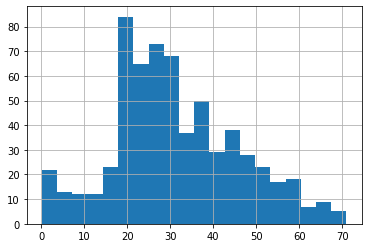

In [11]:
titanic.age.hist(bins=20)

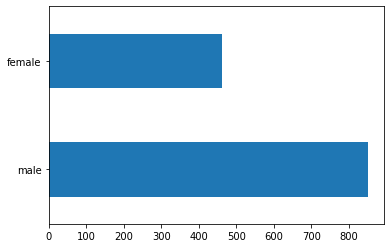

In [18]:
titanic.sex.value_counts().plot(kind = 'barh')

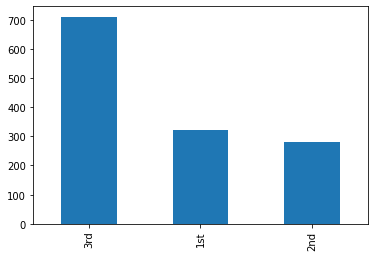

In [20]:
titanic.pclass.value_counts().plot(kind = 'bar')

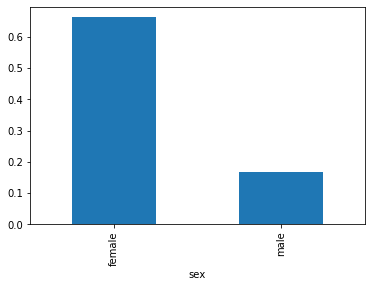

In [22]:
titanic.groupby('sex').survived.mean().plot(kind='bar')

In [ ]:
# 筛选特征值和目标值
x = titanic[["pclass", "age", "sex"]]
y = titanic["survived"]

In [ ]:
# 2、数据处理
# 1）缺失值处理
x["age"].fillna(x["age"].mean(), inplace=True)

In [ ]:
# 2) 转换成字典.由于age，pclass都是分类特征，最好转化成字典，然后用字典特征抽取
x = x.to_dict(orient="records")


In [ ]:
from sklearn.model_selection import train_test_split
# 3、数据集划分
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22)

In [ ]:
# 4、字典特征抽取
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
transfer = DictVectorizer()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

In [ ]:
# 3）决策树预估器
estimator = DecisionTreeClassifier(criterion="entropy", max_depth=8)
estimator.fit(x_train, y_train)

# 4）模型评估
# 方法1：直接比对真实值和预测值
y_predict = estimator.predict(x_test)
print("y_predict:\n", y_predict)
print("直接比对真实值和预测值:\n", y_test == y_predict)

# 方法2：计算准确率
score = estimator.score(x_test, y_test)
print("准确率为：\n", score)

# 可视化决策树
export_graphviz(estimator, out_file="data/titanic_tree.dot", feature_names=transfer.get_feature_names())


### 随机森林对泰坦尼克号乘客的生存进行预测

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
estimator = RandomForestClassifier()
# 加入网格搜索与交叉验证
# 参数准备
param_dict = {"n_estimators": [120,200,300,500,800,1200], "max_depth": [5,8,15,25,30]}
estimator = GridSearchCV(estimator, param_grid=param_dict, cv=3)
estimator.fit(x_train, y_train)

# 5）模型评估
# 方法1：直接比对真实值和预测值
y_predict = estimator.predict(x_test)
print("y_predict:\n", y_predict)
print("直接比对真实值和预测值:\n", y_test == y_predict)

# 方法2：计算准确率
score = estimator.score(x_test, y_test)
print("准确率为：\n", score)

# 最佳参数：best_params_
print("最佳参数：\n", estimator.best_params_)
# 最佳结果：best_score_
print("最佳结果：\n", estimator.best_score_)
# 最佳估计器：best_estimator_
print("最佳估计器:\n", estimator.best_estimator_)
# 交叉验证结果：cv_results_
print("交叉验证结果:\n", estimator.cv_results_)